In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
study_folder = r"C:\Users\Tobias\Documents\Masterarbeit_lokal\ParamStudies\Distance_3cams_rotY360_s0_12"

PSets_Info = pd.read_csv(Path(study_folder) / "ParameterSet.csv")
PSets_Eval = pd.read_csv(Path(study_folder) / "EvaluationParameterStudy.csv")

Berechne Fehler in den morphologischen Größen und füge sie dem Evaluierungsdatensatz hinzu

In [58]:
sphericity_error_perc = (PSets_Eval["sphericity_rec"] - PSets_Eval["sphericity_ref"]) / PSets_Eval["sphericity_ref"]*100
vol_error_perc = (PSets_Eval["volume_rec"] - PSets_Eval["volume_ref"]) / PSets_Eval["volume_ref"]*100
PSets_Eval["sphericity_error_perc"] = sphericity_error_perc; PSets_Eval["vol_error_perc"] = vol_error_perc; 

Berechne die Positionsfehlerquote

In [59]:
r_PFQ_perc  = PSets_Eval["cam_outliers"] / PSets_Eval["rec_cams"] *100
PSets_Eval["r_PFQ_perc"] = r_PFQ_perc; 

Verkleinerer den Evaluierungsdatensatz auf die relevanten Größen

In [60]:
PSets_Eval["cam_mean_error_perc"]  = PSets_Eval["cam_mean_rel_error"]*100
PSets_Eval_small = PSets_Eval[["cam_mean_error_perc","r_PFQ_perc","vol_error_perc","sphericity_error_perc"]]
PSets_Eval_small_qual = PSets_Eval[["cam_mean_error_perc","r_PFQ_perc","vol_error_perc","sphericity_error_perc","quality_index"]]
PSets_Info_small = PSets_Info[["cam_distance","reps"]]

Erstelle einen wesentlichen Gesamtdatensatz

In [61]:
PSets_Bundle = pd.concat([PSets_Info_small,PSets_Eval_small],axis=1)

Plotte Auswertungsgröße über die varrierten Größe

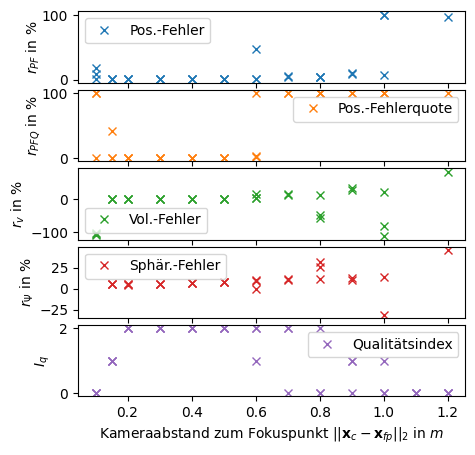

In [62]:
PSets_Eval_small_qual.index = PSets_Info_small["cam_distance"]

axes = PSets_Eval_small_qual.plot(subplots=True, figsize=(5, 5), style='x')
#plt.xticks([2, 3, 4, 5, 6])
plt.xlabel("Kameraabstand zum Fokuspunkt $||\mathbf{x}_{c} - \mathbf{x}_{fp}||_2$ in $m$")
axes[0].legend(["Pos.-Fehler"]); axes[0].set_ylabel("$r_{PF}$ in %",labelpad=0)
axes[1].legend(["Pos.-Fehlerquote"]); axes[1].set_ylabel("$r_{PFQ}$ in %",labelpad=0)
axes[2].legend(["Vol.-Fehler"]); axes[2].set_ylabel("$r_{v}$ in %",labelpad = 2)
axes[3].legend(["Sphär.-Fehler"]); axes[3].set_ylabel("$r_\Psi$ in %",labelpad=2)
axes[4].legend(["Qualitätsindex"]); axes[4].set_ylabel("$I_q$",labelpad=5)
plt.subplots_adjust(hspace=0.1)
plt.savefig("distance_eval_5subplots.svg", format="svg")
plt.show()


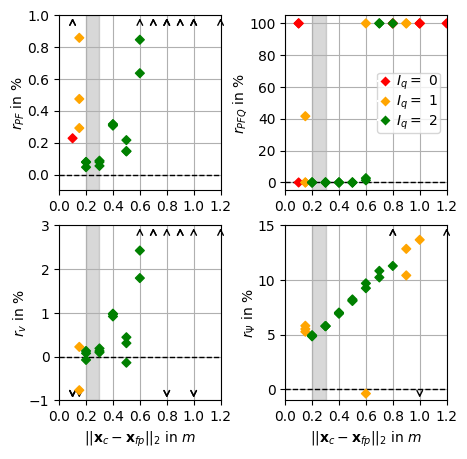

In [ ]:
import sys
import os
import importlib
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
importlib.reload(sys.modules['Figures.plot_quality_critieria']) if 'Figures.plot_quality_critieria' in sys.modules else None
from Figures.plot_quality_critieria import plot_4_quality_criteria


figsize = (5,5)
marker = "D"
markersize = 20
markersize_legend = markersize /3.5
grid = True
xticks = [0.2,0.4,0.6,0.8,0,1,1.2] # None
optimal_span = [0.2, 0.3] # None
labelpad = [0, 0, 0, 0]
one_decimal_place = False
font_size = 10
legend_loc = "center right"
arrows_color = "black" # None: --> Farbe des Pfeils ist abhängig vom Qualitätsindex
plot_x0_line = True
savefig_path = None
y_limits = [(-0.1, 1), (-5, 105), (-1, 3), (-1, 15)]  # Definierte y-Limits für die einzelnen Subplots
xlabel = "$||\mathbf{x}_{c} - \mathbf{x}_{fp}||_2$ in $m$"

fig, ax = plot_4_quality_criteria(PSets_Eval,PSets_Eval_small, savefig_path, figsize, xlabel, marker,markersize, 
                            arrows_color, font_size, labelpad, xticks, grid,
                            one_decimal_place, plot_x0_line, markersize_legend, legend_loc, optimal_span, y_limits)

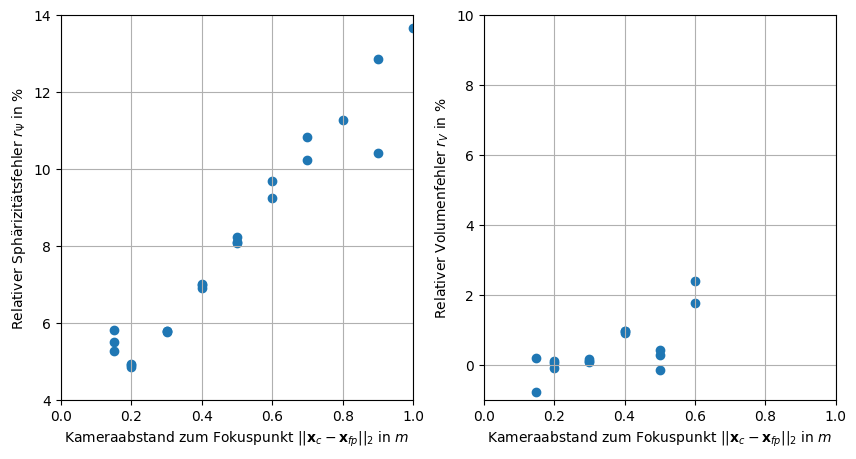

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))

ax[0].scatter(PSets_Bundle["cam_distance"], PSets_Bundle["sphericity_error_perc"], marker='o')
ax[0].grid(True)
ax[0].set_xlabel("Kameraabstand zum Fokuspunkt $||\mathbf{x}_{c} - \mathbf{x}_{fp}||_2$ in $m$")
ax[0].set_ylabel("Relativer Sphärizitätsfehler $r_\Psi$ in %")
ax[0].set_xlim([0,1])
ax[0].set_ylim([4,14])

ax[1].scatter(PSets_Bundle["cam_distance"], PSets_Bundle["vol_error_perc"], marker='o')
ax[1].grid(True)
ax[1].set_xlabel("Kameraabstand zum Fokuspunkt $||\mathbf{x}_{c} - \mathbf{x}_{fp}||_2$ in $m$")
ax[1].set_ylabel("Relativer Volumenfehler $r_V$ in %")
ax[1].set_xlim([0,1])
ax[1].set_ylim([-1,10])
plt.show()


Laufzeitanalyse

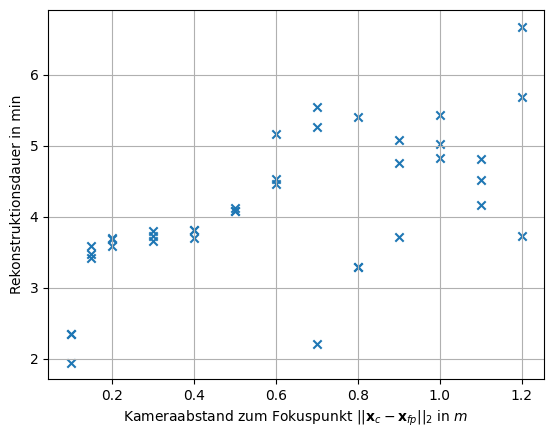

In [ ]:
fig, ax = plt.subplots()  # Erstellen einer Figur und eines Subplots
ax.scatter(PSets_Info_small["cam_distance"], PSets_Info["rec_time"]/60,marker="x")  # Erstellen eines Scatter-Plots
ax.set_xlabel("Kameraabstand zum Fokuspunkt $||\mathbf{x}_{c} - \mathbf{x}_{fp}||_2$ in $m$")  # Beschriftung der x-Achse
ax.set_ylabel("Rekonstruktionsdauer in min")  # Beschriftung der y-Achse
ax.grid(True)
plt.show()  # Anzeigen des Plots

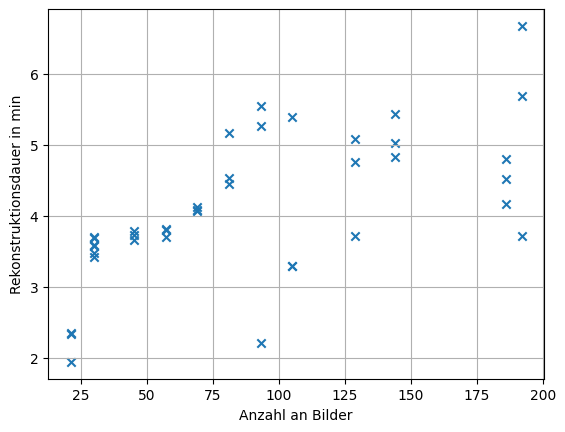

In [ ]:
fig, ax = plt.subplots()  # Erstellen einer Figur und eines Subplots
ax.scatter(PSets_Eval["images"], PSets_Info["rec_time"]/60,marker="x")  # Erstellen eines Scatter-Plots
ax.set_xlabel("Anzahl an Bilder")  # Beschriftung der x-Achse
ax.set_ylabel("Rekonstruktionsdauer in min")  # Beschriftung der y-Achse
ax.grid(True)
plt.show()  # Anzeigen des Plots

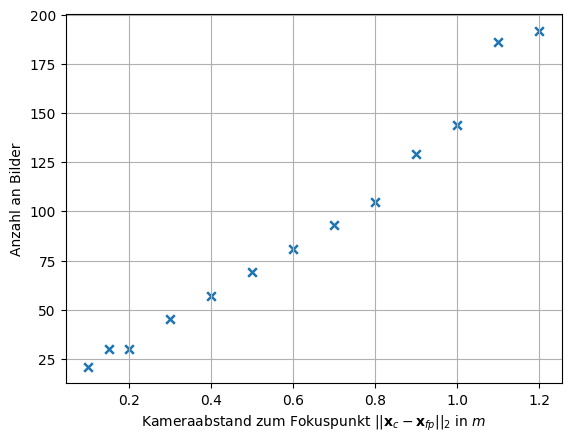

In [ ]:
fig, ax = plt.subplots()  # Erstellen einer Figur und eines Subplots
ax.scatter(PSets_Info_small["cam_distance"], PSets_Eval["images"],marker="x")  # Erstellen eines Scatter-Plots
ax.set_xlabel("Kameraabstand zum Fokuspunkt $||\mathbf{x}_{c} - \mathbf{x}_{fp}||_2$ in $m$")  # Beschriftung der x-Achse
ax.set_ylabel("Anzahl an Bilder")  # Beschriftung der y-Achse
ax.grid(True)
plt.show()  # Anzeigen des Plots

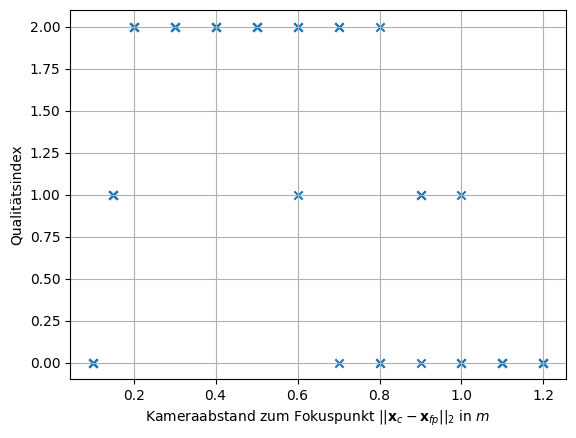

In [ ]:
fig, ax = plt.subplots()  # Erstellen einer Figur und eines Subplots
ax.scatter(PSets_Info_small["cam_distance"],PSets_Eval["quality_index"],marker="x")  # Erstellen eines Scatter-Plots
ax.set_xlabel("Kameraabstand zum Fokuspunkt $||\mathbf{x}_{c} - \mathbf{x}_{fp}||_2$ in $m$")  # Beschriftung der x-Achse
ax.set_ylabel("Qualitätsindex")  # Beschriftung der y-Achse
ax.grid(True)
plt.show()  # Anzeigen des Plots

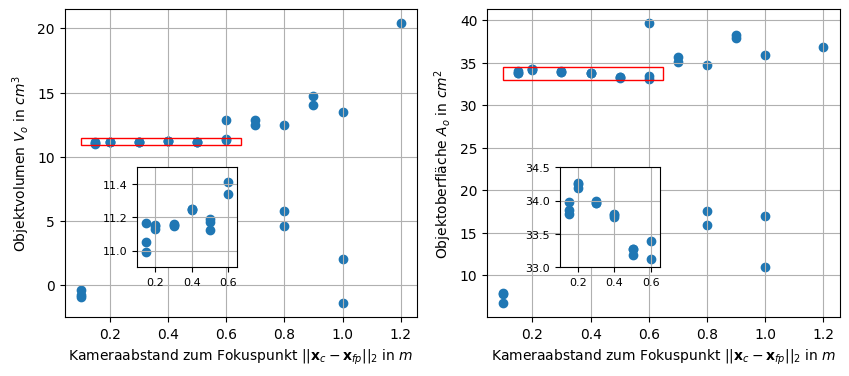

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

# Parameter für die Größe der Inset-Diagramme (absolut oder relativ)
inset_width = 1   # 30% der Hauptplot-Breite
inset_height = 1  # 30% der Hauptplot-Höhe

# Beispielkoordinaten für den Mittelpunkt des Inset-Plots
inset_center_x_vol = 0.01  # x-Koordinate des Mittelpunkts für das Volumen-Inset
inset_center_y_vol = 0.01  # y-Koordinate des Mittelpunkts für das Volumen-Inset
inset_center_x_surf = 0.01 # x-Koordinate des Mittelpunkts für das Oberflächen-Inset
inset_center_y_surf = 0.01# y-Koordinate des Mittelpunkts für das Oberflächen-Inset

# Parameter für die x- und y-Bereiche der Inset-Diagramme
inset_x_range_vol = (0.1, 0.65)       # x-Bereich für das Inset-Diagramm - Objektvolumen
inset_y_range_vol = (10.9, 11.5)   # y-Bereich für das Inset-Diagramm - Objektvolumen
inset_x_range_surf = (0.1, 0.65)      # x-Bereich für das Inset-Diagramm - Objektoberfläche
inset_y_range_surf = (33, 34.5)    # y-Bereich für das Inset-Diagramm - Objektoberfläche

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Hauptplot für Objektvolumen - zeigt gesamten Wertebereich
ax[0].scatter(PSets_Bundle["cam_distance"], PSets_Eval["volume_rec"] * 10**6, marker='o')
ax[0].grid(True)
ax[0].set_xlabel("Kameraabstand zum Fokuspunkt $||\\mathbf{x}_{c} - \\mathbf{x}_{fp}||_2$ in $m$")
ax[0].set_ylabel("Objektvolumen $V_o$ in $cm^3$")

# Inset-Plot für eingeschränkten Bereich - Objektvolumen mit festgelegtem Mittelpunkt
inset_ax0 = inset_axes(ax[0], width=inset_width, height=inset_height,
                       bbox_to_anchor=(inset_center_x_vol - inset_width / 2,
                                       inset_center_y_vol - inset_height / 2,
                                       inset_width, inset_height),
                       bbox_transform=ax[0].transAxes)
inset_ax0.scatter(PSets_Bundle["cam_distance"], PSets_Eval["volume_rec"] * 10**6, marker='o')
inset_ax0.grid(True)
inset_ax0.set_xlim(inset_x_range_vol)  # Eingeschränkter x-Bereich
inset_ax0.set_ylim(inset_y_range_vol)  # Eingeschränkter y-Bereich
inset_ax0.tick_params(labelsize=8)

# Rechteck im Hauptplot für Inset-Bereich - Objektvolumen
rect0 = patches.Rectangle((inset_x_range_vol[0], inset_y_range_vol[0]),
                          inset_x_range_vol[1] - inset_x_range_vol[0],
                          inset_y_range_vol[1] - inset_y_range_vol[0],
                          linewidth=1, edgecolor='red', facecolor='none', zorder=5)
ax[0].add_patch(rect0)

# Hauptplot für Objektoberfläche - zeigt gesamten Wertebereich
ax[1].scatter(PSets_Bundle["cam_distance"], PSets_Eval["surface_rec"] * 10**4, marker='o')
ax[1].grid(True)
ax[1].set_xlabel("Kameraabstand zum Fokuspunkt $||\\mathbf{x}_{c} - \\mathbf{x}_{fp}||_2$ in $m$")
ax[1].set_ylabel("Objektoberfläche $A_o$ in $cm^2$")

# Inset-Plot für eingeschränkten Bereich - Objektoberfläche mit festgelegtem Mittelpunkt
inset_ax1 = inset_axes(ax[1], width=inset_width, height=inset_height,
                       bbox_to_anchor=(inset_center_x_surf - inset_width / 2,
                                       inset_center_y_surf - inset_height / 2,
                                       inset_width, inset_height),
                       bbox_transform=ax[1].transAxes)
inset_ax1.scatter(PSets_Bundle["cam_distance"], PSets_Eval["surface_rec"] * 10**4, marker='o')
inset_ax1.grid(True)
inset_ax1.set_xlim(inset_x_range_surf)  # Eingeschränkter x-Bereich
inset_ax1.set_ylim(inset_y_range_surf)  # Eingeschränkter y-Bereich
inset_ax1.tick_params(labelsize=8)

# Rechteck im Hauptplot für Inset-Bereich - Objektoberfläche
rect1 = patches.Rectangle((inset_x_range_surf[0], inset_y_range_surf[0]),
                          inset_x_range_surf[1] - inset_x_range_surf[0],
                          inset_y_range_surf[1] - inset_y_range_surf[0],
                          linewidth=1, edgecolor='red', facecolor='none', zorder=5)
ax[1].add_patch(rect1)

plt.savefig("volume_and_surface.svg")
plt.show()
